In [1]:
%pylab inline
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'

Populating the interactive namespace from numpy and matplotlib


Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.
Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.

The data contains 24 instances about fitting contact lens. The training set is complete and noise free. And there are 4 nominal atrributes.

Attribute Information:
    -- 3 Classes
     1 : the patient should be fitted with hard contact lenses,
     2 : the patient should be fitted with soft contact lenses,
     3 : the patient should not be fitted with contact lenses.

    1. age of the patient: (1) young, (2) pre-presbyopic, (3) presbyopic
    2. spectacle prescription:  (1) myope, (2) hypermetrope
    3. astigmatic:     (1) no, (2) yes
    4. tear production rate:  (1) reduced, (2) normal

Class Distribution:
   1. hard contact lenses: 4
   2. soft contact lenses: 5
   3. no contact lenses: 15

In [76]:
lens=pd.read_csv(fileURL, names=['ID', 'Age', 'Spectacle_Prescription','astigmatic','tear_production_rate','Classes'],header=None,delim_whitespace=True)
lens = lens[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate','Classes']]

In [77]:
lens[:10]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate,Classes
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3
5,1,2,1,2,2
6,1,2,2,1,3
7,1,2,2,2,1
8,2,1,1,1,3
9,2,1,1,2,2


In [78]:
lens['Classes'].replace({1:'Hard_Lens',2:'Soft_lens',3:'No_contacts'},inplace=True)

In [79]:
lens[:5]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate,Classes
0,1,1,1,1,No_contacts
1,1,1,1,2,Soft_lens
2,1,1,2,1,No_contacts
3,1,1,2,2,Hard_Lens
4,1,2,1,1,No_contacts


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a8c6390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ad5a160>]], dtype=object)

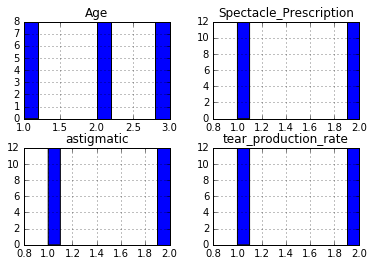

In [80]:
lens.hist()


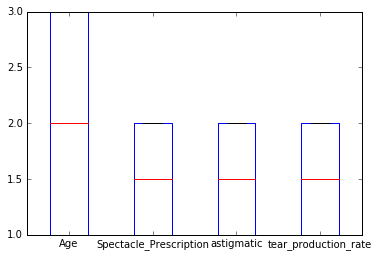

In [81]:
box = lens.boxplot(grid=False, return_type='axes')

Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.
The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

In [88]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
features = lens[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate']]
target = lens[['Classes']]
clf = clf.fit(features, target)

In [89]:
features[:5]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate
0,1,1,1,1
1,1,1,1,2
2,1,1,2,1
3,1,1,2,2
4,1,2,1,1


In [94]:
target[:5]

,Classes
0,No_contacts
1,Soft_lens
2,No_contacts
3,Hard_Lens
4,No_contacts


In [95]:
#with open("lens.dot", 'w') as f:f = tree.export_graphviz(clf, out_file=f)

In [96]:
##import os
#os.unlink('lens.dot')

In [97]:
from IPython.display import Image
import pydotplus 
tree.export_graphviz(clf,
                         feature_names=['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate'],  
                         class_names='Classes',  
                         filled=True, rounded=True,  
                         special_characters=True)  

In the tree.png graph, class=1 means the patient should not be fitted with contact lenses. class = a means soft_lens and class=C means hard_lens. 


Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [103]:
clf.predict([[1,2,2,2],[2,1,2,1],[3,2,1,2]])

array(['Hard_Lens', 'No_contacts', 'Soft_lens'], dtype=object)

In [111]:
clf.predict([[1,2,2,2],[1,1,1,3],[3,1,1,2]])

array(['Hard_Lens', 'Soft_lens', 'No_contacts'], dtype=object)

The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type,if any, to fit. But we can still use the given four attributes to predict. In this model, the tear production rate <=1.5, it means the patients should not wear contact lenses. When tear production rate > 1.5, then we check astigmatic. When astigmatic <= 1.5, we check the age. When the patient is younger than 18, then use soft lens. when older than 18, then check spetable prescription. If myope then use no lens; if hypermetrope, then use soft lens. 

When astigmatic > 1.5, we check spetacle prescription either myope or hypermetrope. If it is myope, it means the patients should wear hard lens. If it is hypermetrope, then we check the age. If younger than 18, then use hard_lens; if older than 18, then no need to use lens. 

This model does making sense to make prediction of fitting lens. 
